### This notebook aims to predict the occurance of Diabetes in a patient given certain conditions.

In [2]:
#Importing Necessary Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import seaborn as sns
%matplotlib inline

In [3]:
#Loading the Dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
#Lets explore the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
#Checking if the dataset contains any null value
df.isnull().values.any()

False

#### Data Visulazation

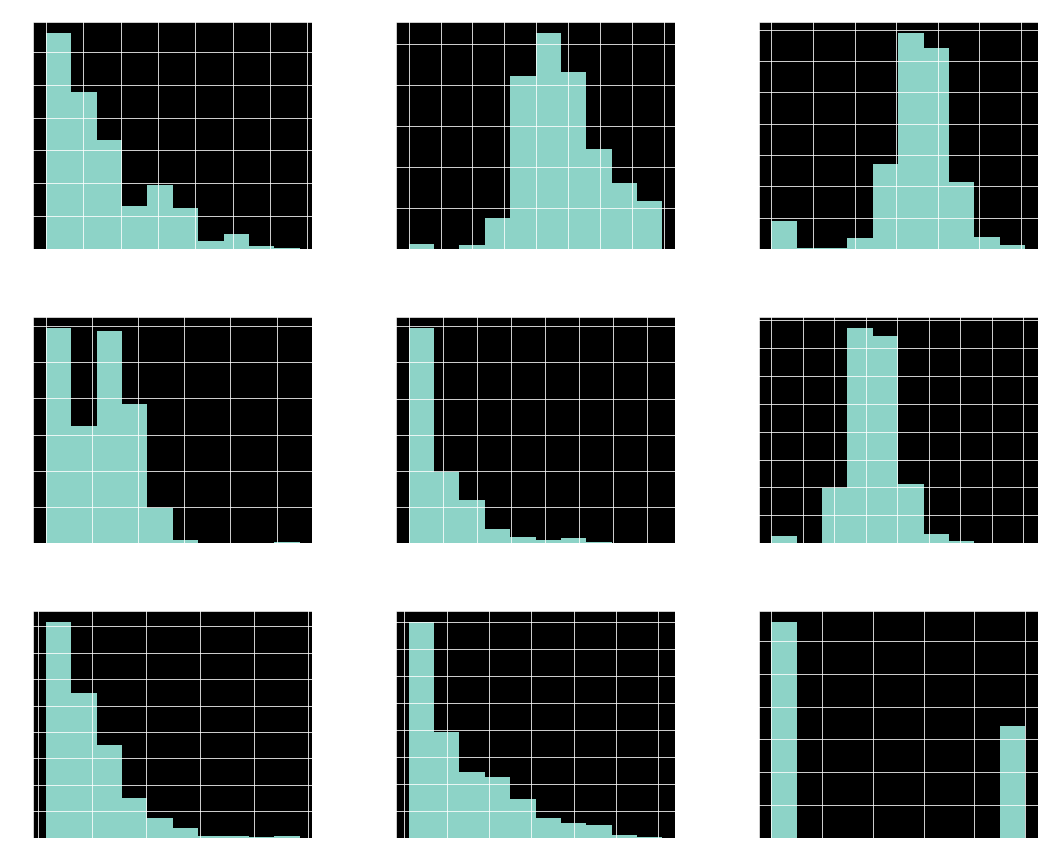

In [7]:
df.hist(bins=10,figsize=(18,15));

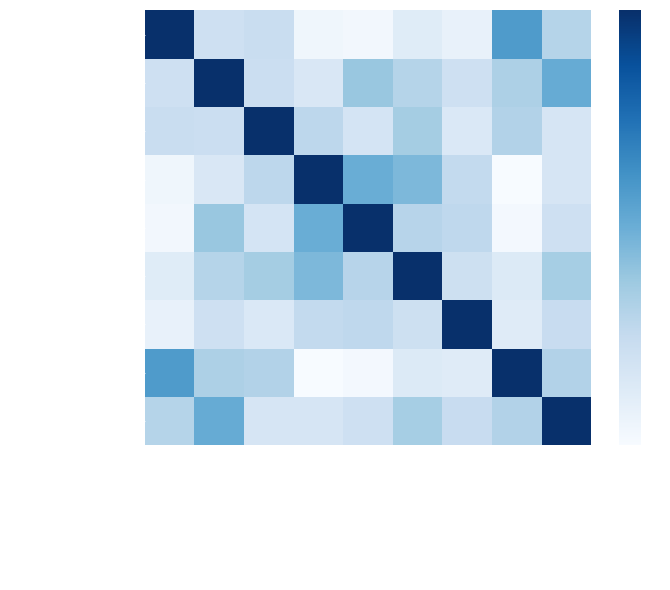

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="Blues");
# Here we will find if the different features of the dataset are independent or dependent on each other

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


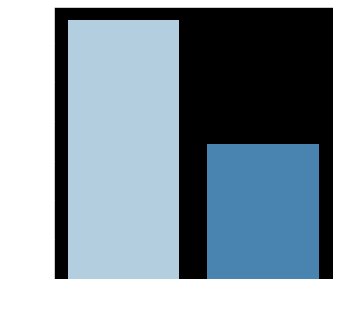

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(df['Outcome'],palette='Blues');
# We are counting the total distribution of the sample data into diabetic(1) and non-diabetic(0) patients.It can also be 
# seen at the histogram above

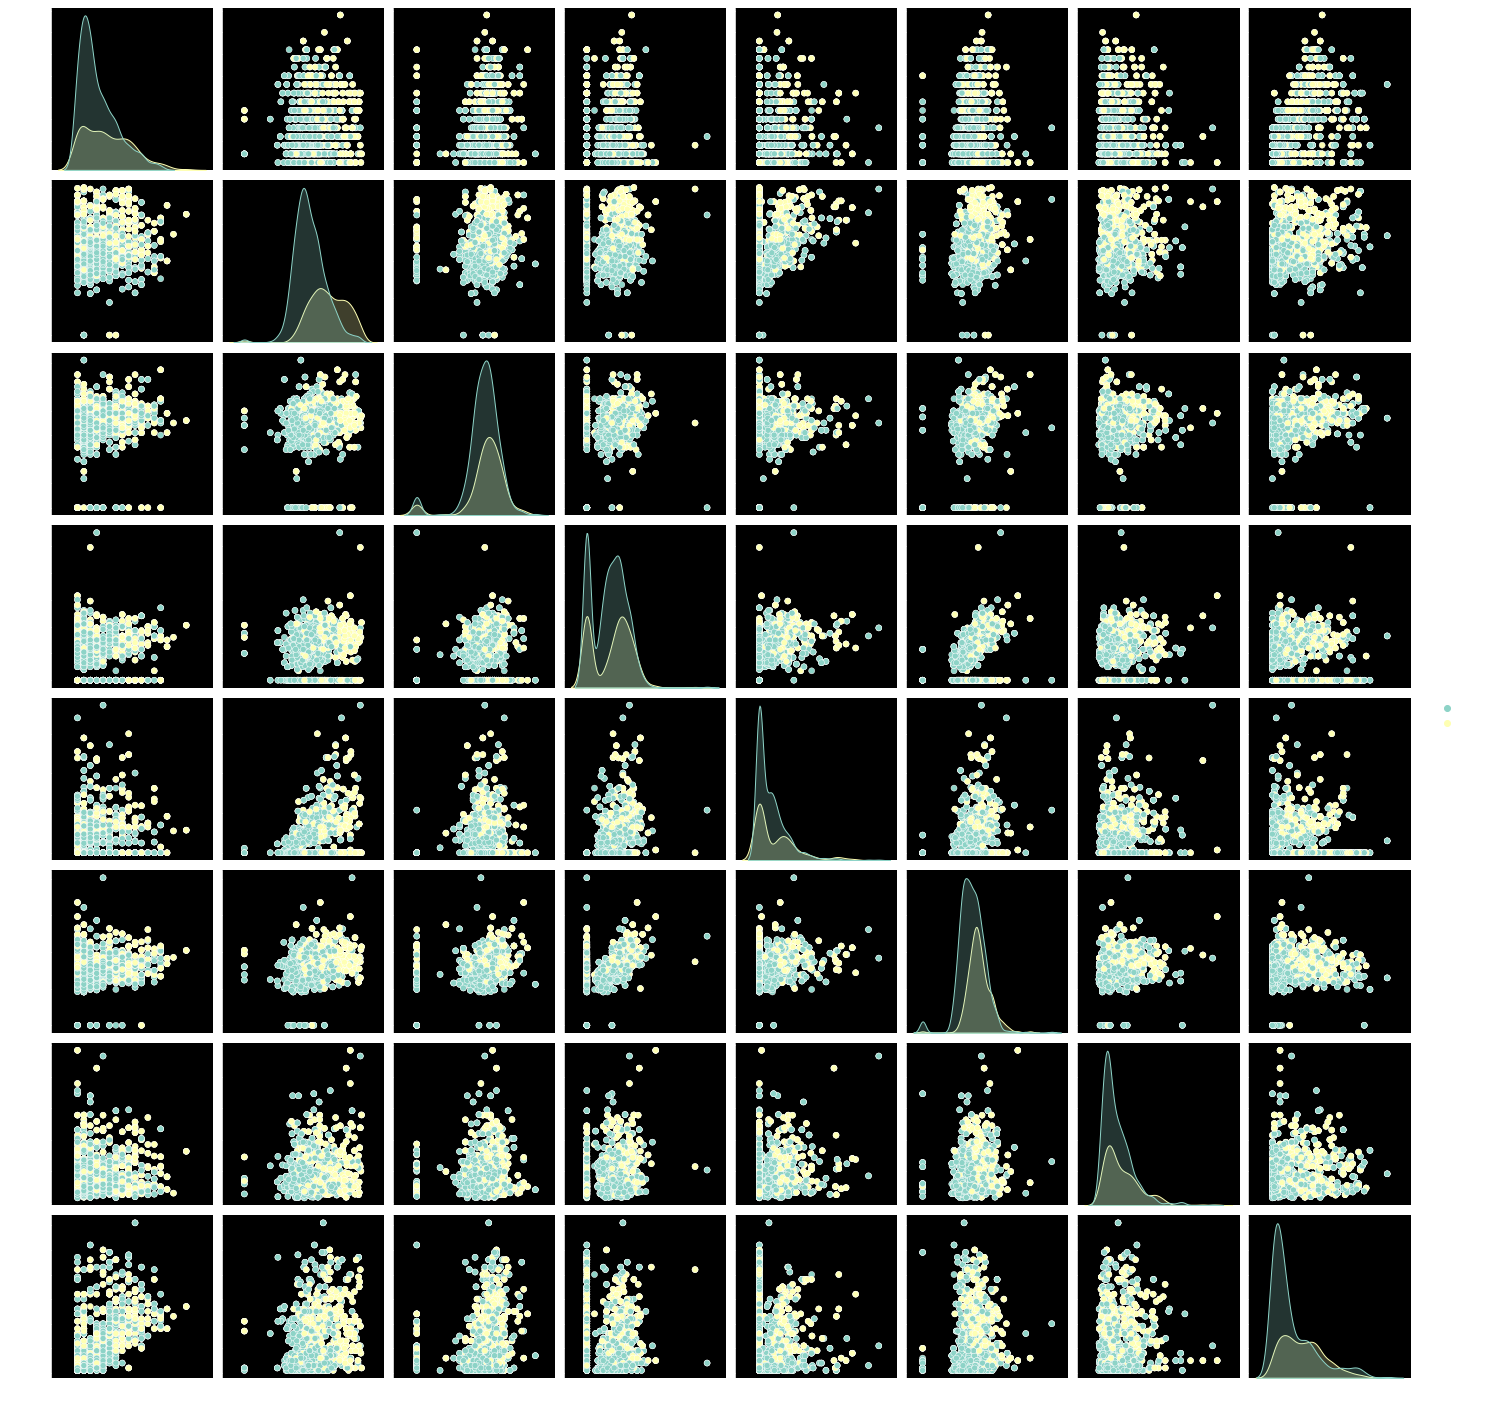

In [10]:
# Lets create a pairplot this will give us a better understanding of the data distribution
sns.pairplot(df,hue='Outcome')

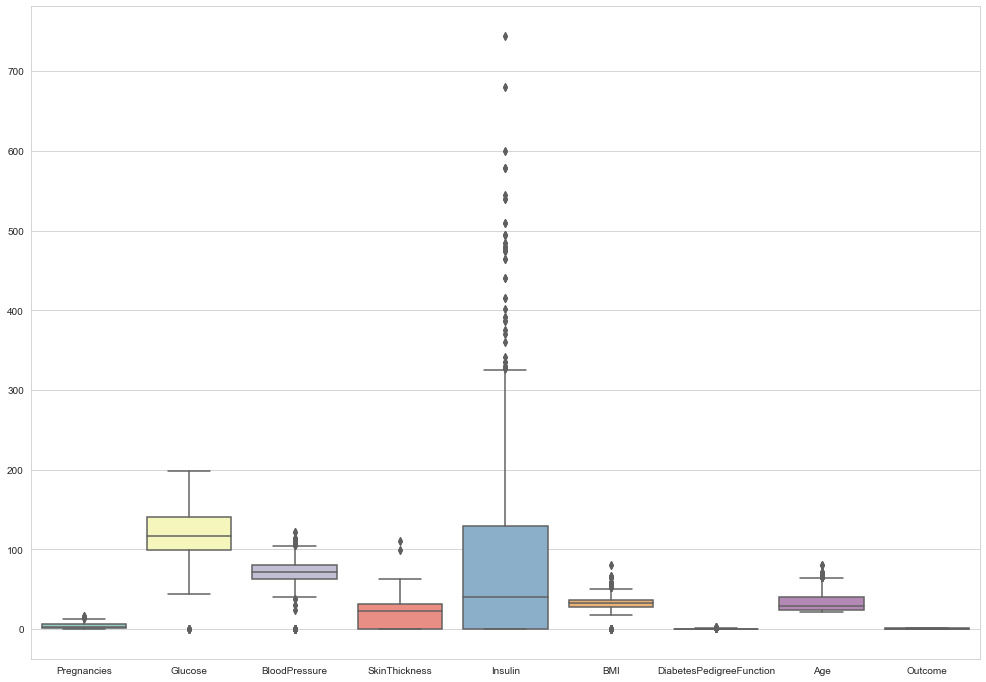

In [11]:
# Outlier Detection
# Box plot are the best tools to detect outlier in a dataset
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))
sns.boxplot(data=df);

In [12]:
# Handling Outliers
# Lets define 1st Quartile 3rd Quartile and the Inter Quartile range first
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("The First Quartile is \n", Q1)
print('\n')
print("The Third Quartile is \n", Q3)
print('\n')
print("The Inter Quartile range is \n", IQR)

The First Quartile is 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64


The Third Quartile is 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64


The Inter Quartile range is 
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesP

In [13]:
data = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

df.shape,data.shape

((2000, 9), (1652, 9))

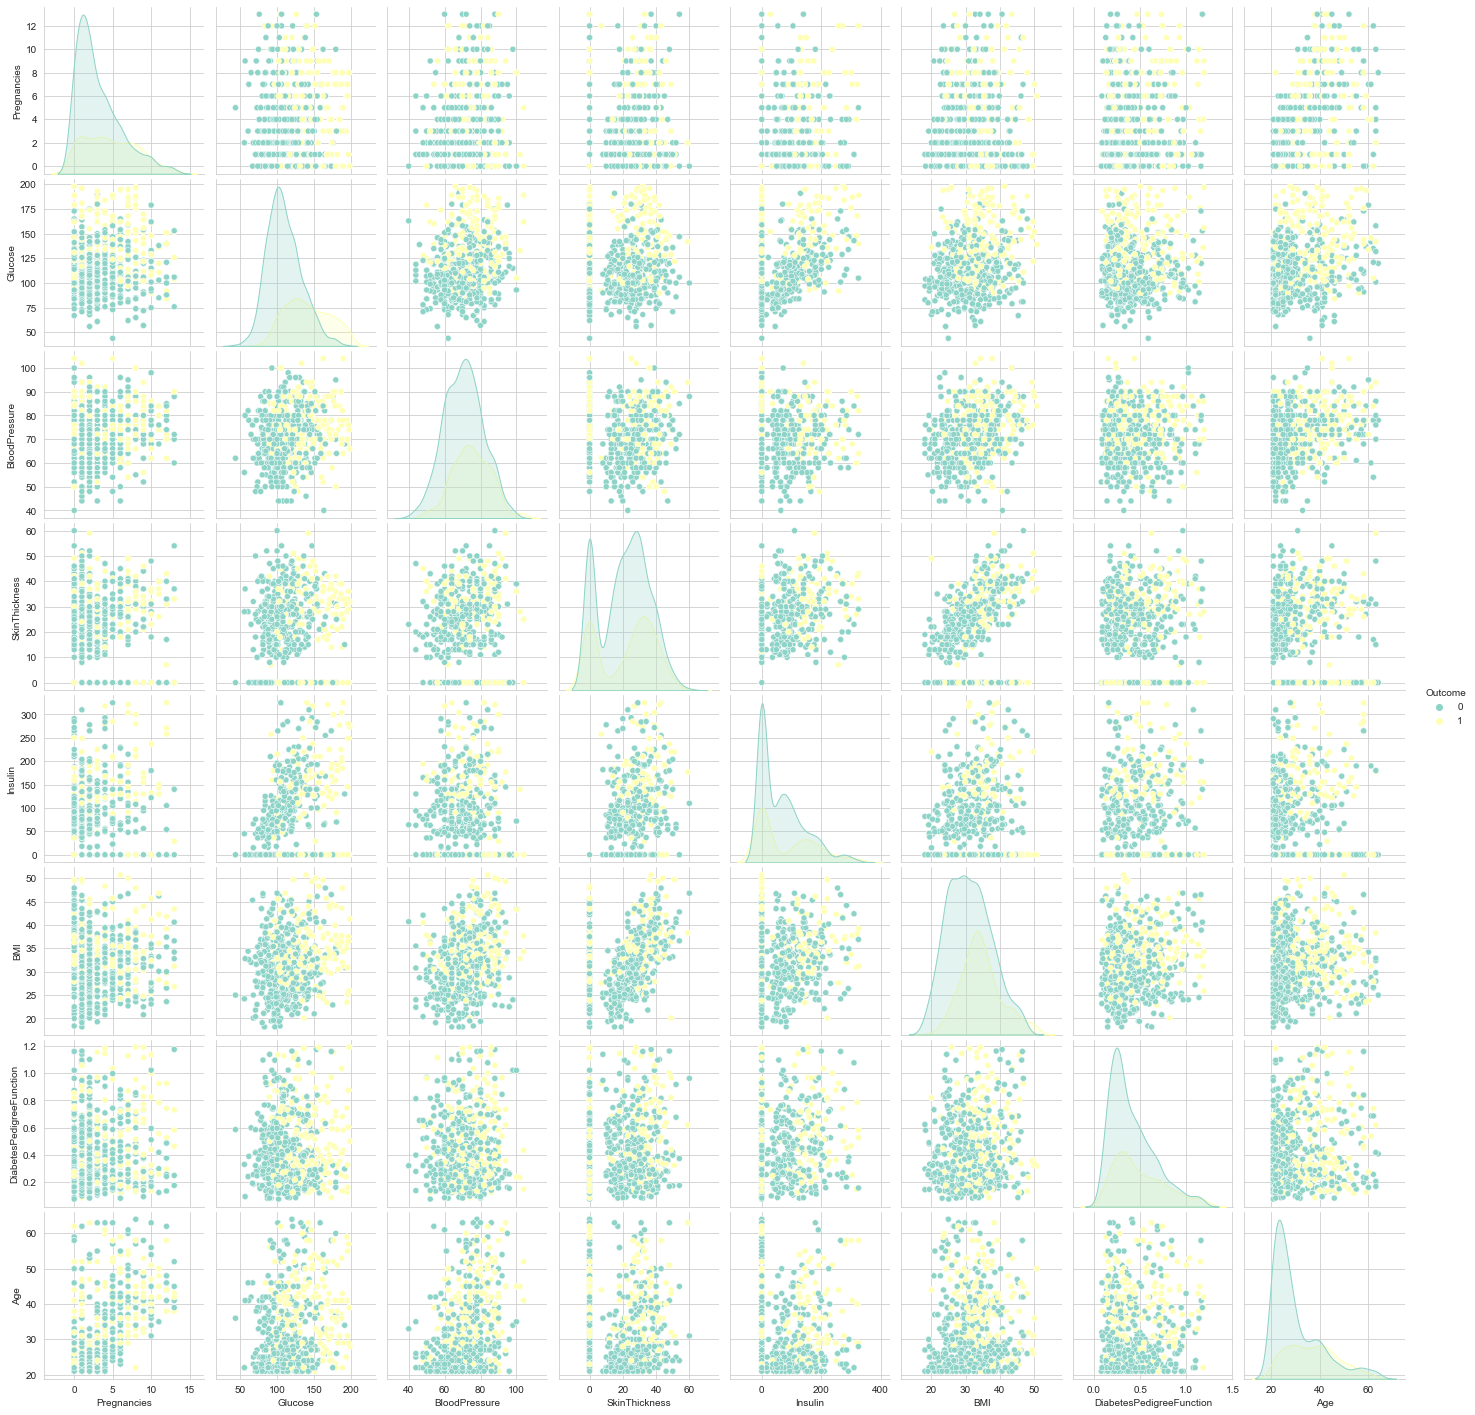

In [14]:
#Let's visualise the dataset after outlier removal
sns.pairplot(data,hue='Outcome')

#### Model Development

In [15]:
# Define feature and target
x = data.drop(columns=['Outcome'])
y = data['Outcome']

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [17]:
x_train.shape,x_test.shape

((1156, 8), (496, 8))

#### Defining the performance metrices

In [49]:
from sklearn.metrics import accuracy_score,roc_auc_score,precision_recall_fscore_support
acc = []
auc = []

def display_result(test,pred):
    precision = precision_recall_fscore_support(test,pred,average='binary')[0]
    recall = precision_recall_fscore_support(test,pred,average='binary')[1]
    fscore = precision_recall_fscore_support(test,pred,average='binary')[2]
    print('The performance metrices of the model are ')
    print("Precision",precision)
    print("Recall",recall)
    print("F-Score",fscore)
    
    

#### Deploying different models

In [50]:
#Linear regression
from sklearn.linear_model import LogisticRegression
c_lr = LogisticRegression(max_iter=1000)
c_lr.fit(x_train,y_train)
pred_lr = c_lr.predict(x_test)

acc_lr = accuracy_score(y_test,pred_lr)
acc.append(acc_lr)
auc_lr = roc_auc_score(y_test,pred_lr)
auc.append(auc_lr)
#Display the Performance Metrices
display_result(y_test,pred_lr)



The performance metrices of the model are 
Precision 0.6915887850467289
Recall 0.5285714285714286
F-Score 0.5991902834008097


In [51]:
#Support Vector machine
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

acc_svc = accuracy_score(y_test,pred_svc)
acc.append(acc_svc)
auc_svc = roc_auc_score(y_test,pred_svc)
auc.append(auc_svc)
#Display the Performance Metrices
display_result(y_test,pred_svc)


The performance metrices of the model are 
Precision 0.6728971962616822
Recall 0.5142857142857142
F-Score 0.5829959514170039


In [52]:
#K nearest Neigbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test,pred_knn)
acc.append(acc_knn)
auc_knn = roc_auc_score(y_test,pred_knn)
auc.append(auc_knn)
#Display the Performance Metrices
display_result(y_test,pred_knn)

The performance metrices of the model are 
Precision 0.72
Recall 0.6428571428571429
F-Score 0.6792452830188679


In [53]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

acc_rfc = accuracy_score(y_test,pred_rfc)
acc.append(acc_rfc)
auc_rfc = roc_auc_score(y_test,pred_rfc)
auc.append(auc_rfc)
#Display the Performance Metrices
display_result(y_test,pred_rfc)

The performance metrices of the model are 
Precision 0.927007299270073
Recall 0.9071428571428571
F-Score 0.9169675090252708


In [54]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb = gnb.predict(x_test)

acc_gnb = accuracy_score(y_test,pred_gnb)
acc.append(acc_gnb)
auc_gnb = roc_auc_score(y_test,pred_gnb)
auc.append(auc_gnb)
#Display the Performance Metrices
display_result(y_test,pred_gnb)

The performance metrices of the model are 
Precision 0.5838926174496645
Recall 0.6214285714285714
F-Score 0.6020761245674741


In [55]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc = gbc.predict(x_test)

acc_gbc = accuracy_score(y_test,pred_gbc)
acc.append(acc_gbc)
auc_gbc = roc_auc_score(y_test,pred_gbc)
auc.append(auc_gbc)
#Display the Performance Metrices
display_result(y_test,pred_gbc)

The performance metrices of the model are 
Precision 0.7835820895522388
Recall 0.75
F-Score 0.7664233576642335


#### Lets us plot our findings

In [77]:
acc

[0.8004032258064516,
 0.7923387096774194,
 0.8286290322580645,
 0.9536290322580645,
 0.7681451612903226,
 0.8709677419354839]

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


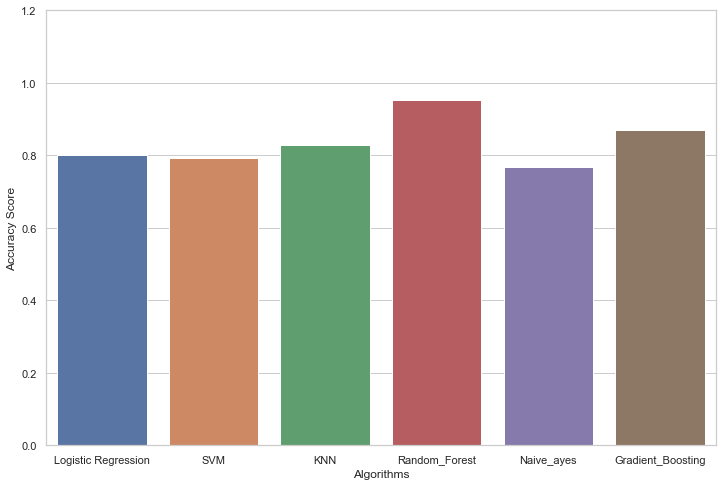

In [82]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
plt.ylim(0,1.2)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
sns.barplot(['Logistic Regression','SVM','KNN','Random_Forest','Naive_ayes','Gradient_Boosting'],acc);

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


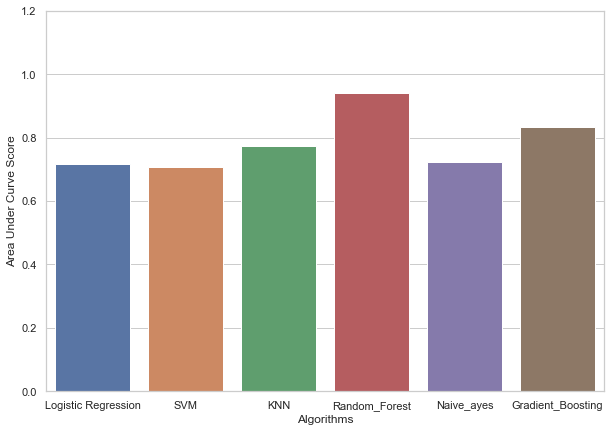

In [74]:
plt.figure(figsize=(10,7))
sns.set_theme(style='whitegrid')
plt.ylim(0,1.2)
plt.xlabel('Algorithms')
plt.ylabel('Area Under Curve Score')
sns.barplot(['Logistic Regression','SVM','KNN','Random_Forest','Naive_ayes','Gradient_Boosting'],auc);

#### In our final visualisation we can see than the Random Forest has the highest Accuracy score as well as Area under curve score